In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']
# X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
28 * 28

784

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
def plot_sample(i):
    plt.imshow(X[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title(y[i])
    plt.show()

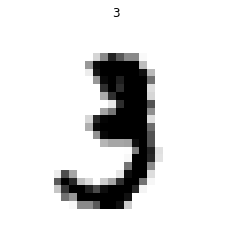

In [15]:
plot_sample(10)

In [16]:
y[0]

'5'

In [18]:
import numpy as np

In [19]:
y = y.astype(np.uint8)
y[0]

5

In [20]:
# hold-out
training_size = 60000
X_train, X_test, y_train, y_test = X[:training_size], X[training_size:], y[:training_size], y[training_size:]

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

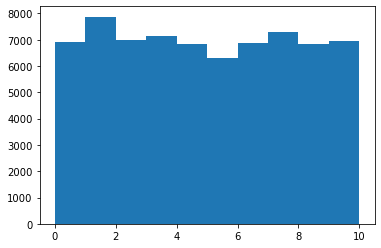

In [29]:
plt.hist(y, bins=range(11))

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

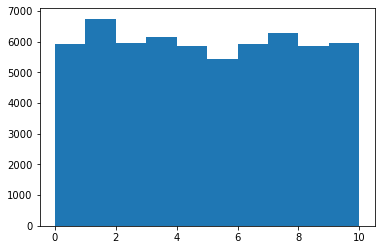

In [30]:
plt.hist(y_train, bins=range(11))

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

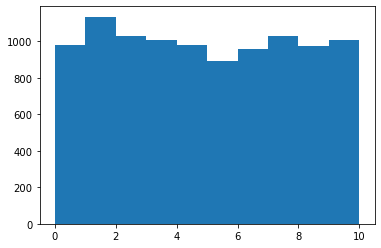

In [31]:
plt.hist(y_test, bins=range(11))

# Constructing a binary classifier: `3-classifier`

In [32]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [33]:
y_train_3[:10]

array([False, False, False, False, False, False, False,  True, False,
       False])

We are using Stochastic Gradient Descent (SGD) classifier

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
sgd_clf = SGDClassifier(random_state=110)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=110)

In [37]:
sgd_clf.predict([X_train[10]])

array([ True])

In [38]:
sgd_clf.predict(X_train[10].reshape(1, -1))

array([ True])

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=5, scoring='accuracy')

array([0.96141667, 0.95875   , 0.96975   , 0.95791667, 0.96658333])

In [41]:
from sklearn.base import BaseEstimator

In [42]:
class Never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [43]:
never3_clf = Never3Classifier()

In [44]:
cross_val_score(never3_clf, X_train, y_train_3, cv=5, scoring='accuracy')

array([0.89766667, 0.89508333, 0.89975   , 0.90008333, 0.8965    ])

In [45]:
6131/60000

0.10218333333333333

In [49]:
from sklearn.model_selection import cross_val_predict

In [51]:
from sklearn.metrics import confusion_matrix 

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=5)
confusion_matrix(y_train_3, y_train_pred)

array([[52886,   983],
       [ 1244,  4887]], dtype=int64)

In [48]:
from sklearn.metrics import precision_score, recall_score

In [54]:
precision_score(y_train_3, y_train_pred)

0.8325383304940375

In [55]:
recall_score(y_train_3, y_train_pred)

0.7970967215788616

In [56]:
y_train_pred = cross_val_predict(never3_clf, X_train, y_train_3, cv=5)

In [57]:
confusion_matrix(y_train_3, y_train_pred)

array([[53869,     0],
       [ 6131,     0]], dtype=int64)

In [58]:
precision_score(y_train_3, y_train_pred)

C:\Users\ali\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [59]:
recall_score(y_train_3, y_train_pred)

0.0